In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The insurance.csv dataset contains 1300+ observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, number_of_children, expenses) and 3 nominal features (gender/sex, is_a_smoker_or_not and region) that were converted into factors with numerical value desginated for each level.

The purposes of this project to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help health insurers to make decision on charging the premium.

In [3]:
filename = 'https://raw.githubusercontent.com/shahkv95/Datasets/master/insurance.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.rename(columns = {'expenses':'charges'}, inplace = True) 

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
# Checking the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Compute pairwise correlation of columns, excluding NA/null values.
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
# Calculating total number of null values, if exists, for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

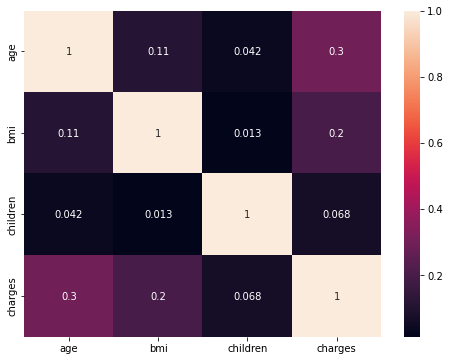

In [12]:
# Visualizing the correlation of numerical features with each other 
# From the below heatmap, we can observe that age is highly correlated with charges compared to the other features
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

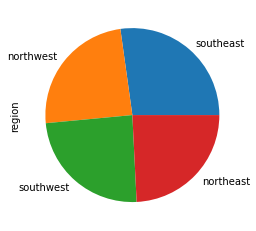

In [13]:
# The below piechart depicts that the data of the people is uniformly distributed over all the four regions. So the region feature can be dropped. 
df.region.value_counts().plot(kind="pie")

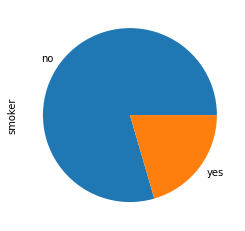

In [14]:
# The below piechart depicts that almost 75% of the people are non-smoker compared to the remaining one-forth of the people
df.smoker.value_counts().plot(kind="pie")

In [15]:
# The tabular data shows the mean and median of the charges that the people are paying as premium group by category of smokers
df.groupby("smoker").charges.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8434.268298,7345.40530,1064
yes,32050.231832,34456.34845,274


In [16]:
# The tabular data shows the mean and median of the charges that the people are paying as premium group by category of gender
df.groupby("sex").charges.agg(["mean","median","count"])

,mean,median,count
sex,,,
female,12569.578844,9412.96250,662
male,13956.751178,9369.61575,676


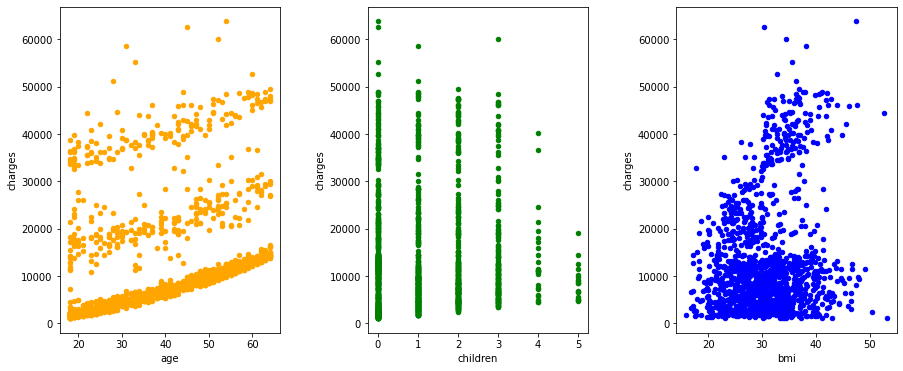

In [17]:
""" 
Scatter plots allow you to map various data attributes to graphical properties of the plot.
The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.
"""
def scatterplot_with_common_y_axis_feature(x1 = 'age', x2 = 'children', x3 = 'bmi', y_common = 'charges'):
  fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
  df.plot(kind='scatter', x=x1, y=y_common, ax=axes[0], color = "orange")
  df.plot(kind='scatter', x=x2, y=y_common, ax=axes[1], color = "green")
  df.plot(kind='scatter', x=x3, y=y_common, ax=axes[2], color = "blue")
scatterplot_with_common_y_axis_feature('age', 'children', 'bmi', 'charges')  

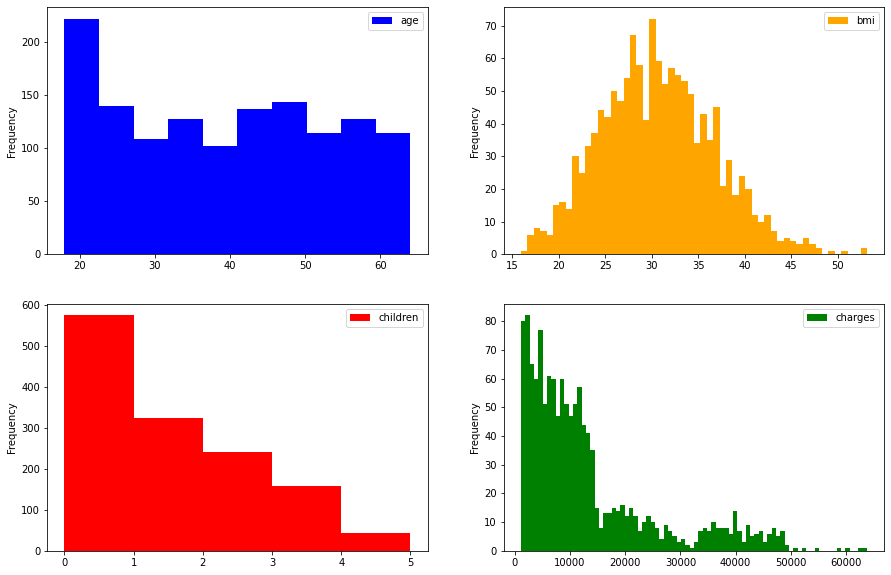

In [18]:
"""
Draw one histogram of the DataFrame’s columns.

A histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one 
matplotlib.axes.Axes. This is useful when the DataFrame’s Series are in a similar scale.
"""

def histogram_with_feature_and_frequency():

  fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
  df.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue', bins = 10)
  df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
  df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 5)
  df.plot(kind='hist', y='charges', ax=axes[1][1], color = 'green', bins = 80)

histogram_with_feature_and_frequency()

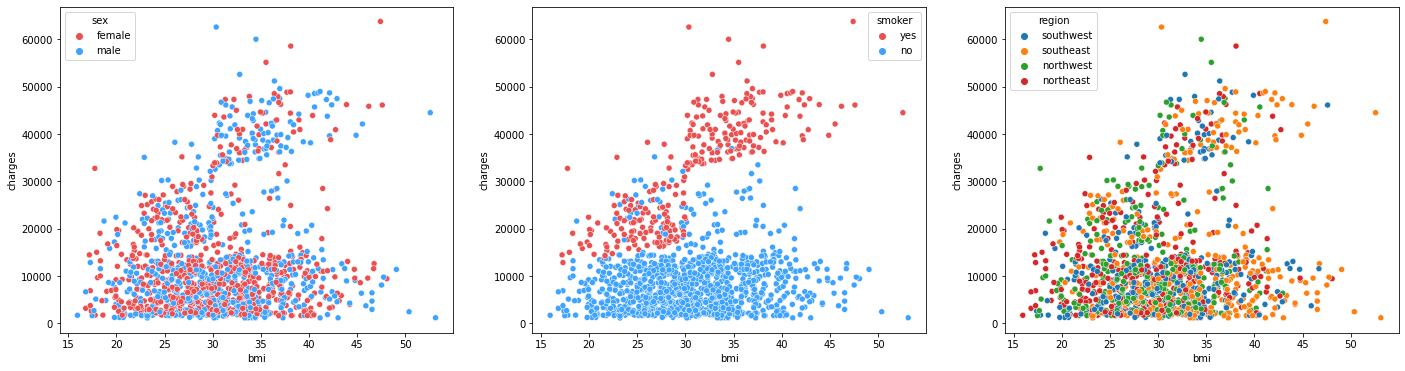

In [19]:
""" 
Scatter plots allow you to map various data attributes to graphical properties of the plot.
The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.
"""
def scatterplot_with_three_dimensions(x = 'bmi', y = 'charges', z1 = 'sex', z2 = 'smoker', z3 = 'region'):
  palette=['#EB5050','#3EA2FF']
  fig, axes = plt.subplots(ncols = 3, figsize = (24,6), squeeze=True)
  sns.scatterplot(x=x, y=y, ax=axes[0], data=df,hue=z1, palette=palette)
  sns.scatterplot(x=x, y=y, ax=axes[1], data=df,hue=z2, palette=palette)
  sns.scatterplot(x=x, y=y, ax=axes[2], data=df,hue=z3)
scatterplot_with_three_dimensions(x = 'bmi', y = 'charges', z1 = 'sex', z2 = 'smoker', z3 = 'region')

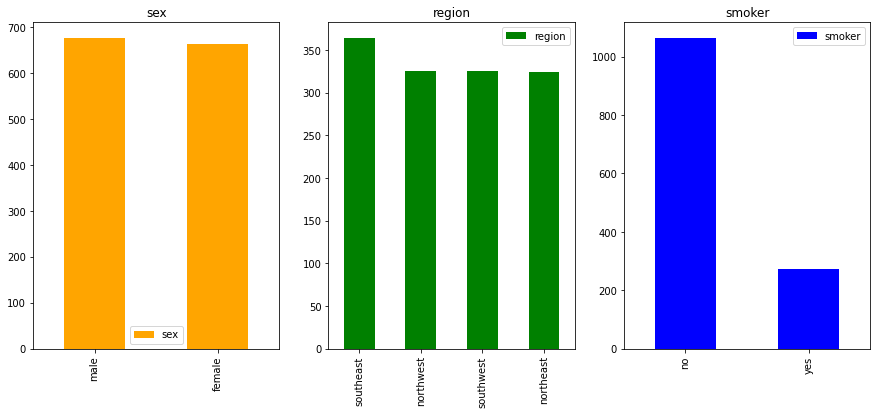

In [20]:
"""
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate 
using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make 
comparisons against it.
"""
def barplot_with_feature_counts(x1 = 'sex', x2 = 'region', x3 = 'smoker'):

  fig, axes = plt.subplots(ncols=3, figsize = (15,6))
  df[x1].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title=str(x1), legend = x1) 
  df[x2].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title=str(x2), legend = x2)
  df[x3].value_counts().plot(kind='bar', color = 'blue', ax=axes[2],title=str(x3), legend = x3)
  
barplot_with_feature_counts('sex', 'region', 'smoker')

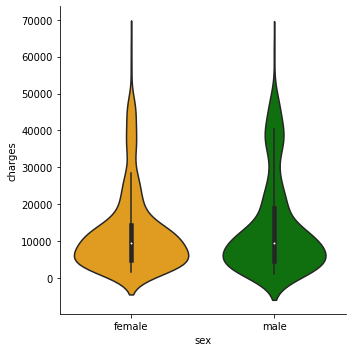

In [21]:
"""
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual 
representations.
"""
palette=['orange','green'] 
sns.catplot(x='sex', y='charges', kind='violin', palette=palette, data=df)

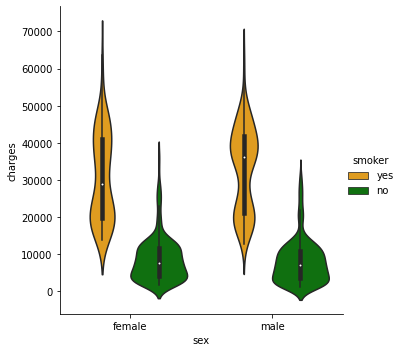

In [22]:
"""
catplot interpretation - analogous to box plot 
median (a white dot on the violin plot)
interquartile range (the black bar in the center of violin)
the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. 
These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.
"""
sns.catplot(x='sex', y='charges', kind='violin', hue='smoker', palette=palette, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


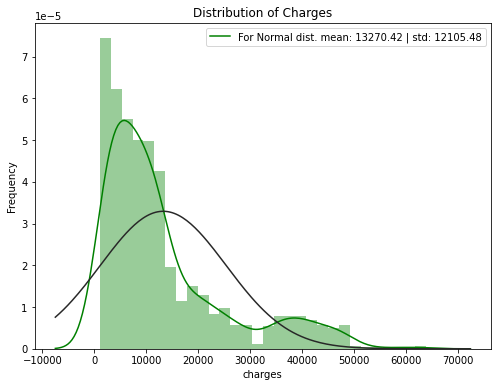

In [23]:
"""
A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.
"""
def distplot_for_features(x = 'charges'):
  from scipy import stats
  from scipy.stats import norm
  fig =plt.figure(figsize=(18,6))
  plt.subplot(1,2,1)
  sns.distplot(df[x], fit=norm, color="green")
  (mu,sigma)= norm.fit(df[x])
  plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
  plt.ylabel('Frequency')
  plt.title('Distribution of Charges')
distplot_for_features('charges')

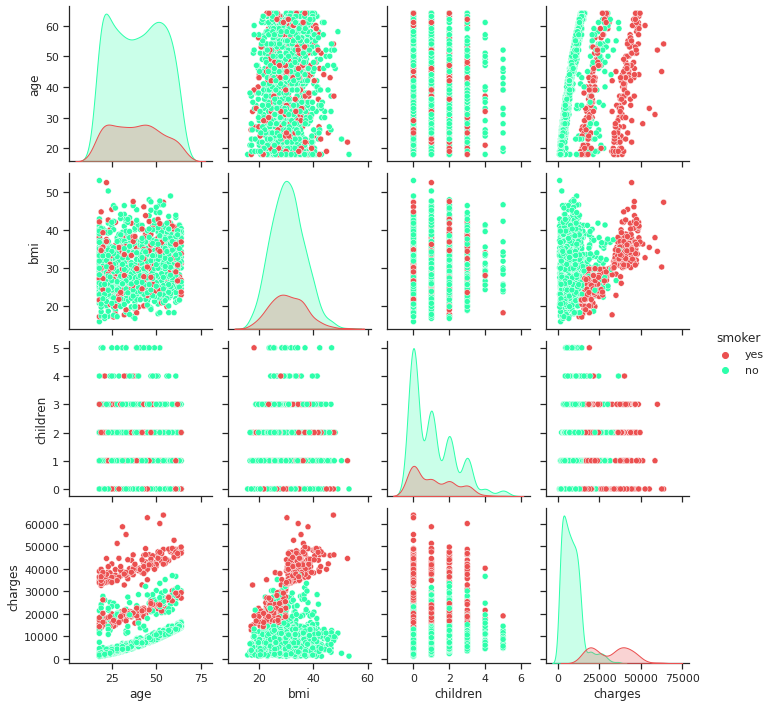

In [24]:
"""
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a 
single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
"""
def pairplot():
  palette=['#EB5050','#2DFFAB'] 
  sns.set(style="ticks")
  sns.pairplot(data=df, hue='smoker', palette=palette)
pairplot()

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.drop(["region"], axis=1, inplace=True) 
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [27]:
# Changing binary categories to 1s and 0s
df['sex'] = df['sex'].map(lambda s :1  if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)

df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [28]:
X = df.drop(['charges'], axis = 1)
y = df.charges
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)


Shape of X:  (1338, 5)
Shape of y:  (1338,)


In [29]:
"""
Ordinary least squares Linear Regression

Fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, 
and the targets predicted by the linear approximation.

predict(X) used for predicting the output using the linear model.

score(X) 
Return the coefficient of determination of the prediction.

The coefficient of determination R^2 is defined as (1 - (u/v)), 
where u is the residual sum of squares ((y_true - y_pred)** 2).sum() 
and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952171980481992


In [30]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
...,...,...
574,13224.05705,14429.077741
1174,4433.91590,6705.247131
1327,9377.90470,11152.092298
817,3597.59600,7200.555548


In [31]:
"""
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as: 
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

fit(X[, y, sample_weight]) - Compute the mean and std to be used for later scaling.
fit_transform(X[, y]) - Fit to data, then transform it.

"""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


In [33]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


In [34]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [35]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [36]:
from sklearn.linear_model import LinearRegression  

multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  -0.4895607457643889
Testing Accuracy:  -0.32411020811102875
RMSE for Training Data:  14589.30728329809
RMSE for Testing Data:  14438.166278828226
Accuracy for 20 - Fold Cross Predicted:  0.71643917152588


In [37]:
"""
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.
The implementation is based on libsvm. 
The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.
"""
from sklearn.svm import SVR  

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  
model_summary(support_vector_reg, "Support_Vector_Regressor")

Support_Vector_Regressor
Training Accuracy:  0.6522181188488771
Testing Accuracy:  0.734317356160215
RMSE for Training Data:  7049.511742428746
RMSE for Testing Data:  6467.427432128608
Accuracy for 20 - Fold Cross Predicted:  0.7009329565044516


In [38]:
"""
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
"""

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  
print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy: ", accuracy_PR_train)
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy: ", accuracy_PR_test)
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=20)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Accuracy:  0.8355000427263595
Testing Accuracy:  0.8808513892718525
RMSE for Training Data:  4848.288522850173
RMSE for Testing Data:  4331.062627077714
Accuracy for 20-Fold Cross Predicted:  0.8392249214398704


In [39]:
"""
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 
Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.
"""

from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8694256791947466
Testing Accuracy:  0.8711939682763064
RMSE for Training Data:  4319.5096631798915
RMSE for Testing Data:  4503.167201972113
Accuracy for 20 - Fold Cross Predicted:  0.8514754907183093


[Text(277.83750000000003, 498.3, 'X[4] <= 0.741\nmse = 142893055.964\nsamples = 1003\nvalue = 13215.863'),
 Text(146.47500000000002, 407.70000000000005, 'X[0] <= 0.232\nmse = 37722602.556\nsamples = 800\nvalue = 8536.841'),
 Text(74.4, 317.1, 'X[0] <= -0.906\nmse = 22884561.817\nsamples = 444\nvalue = 5416.66'),
 Text(37.2, 226.5, 'X[3] <= 0.351\nmse = 24961248.153\nsamples = 197\nvalue = 3832.303'),
 Text(18.6, 135.89999999999998, 'X[0] <= -1.191\nmse = 20054509.096\nsamples = 166\nvalue = 3351.646'),
 Text(9.3, 45.299999999999955, 'mse = 17410003.072\nsamples = 118\nvalue = 2932.558'),
 Text(27.900000000000002, 45.299999999999955, 'mse = 25062383.966\nsamples = 48\nvalue = 4381.905'),
 Text(55.800000000000004, 135.89999999999998, 'X[2] <= 0.002\nmse = 43374246.927\nsamples = 31\nvalue = 6406.145'),
 Text(46.5, 45.299999999999955, 'mse = 56623373.863\nsamples = 22\nvalue = 7529.156'),
 Text(65.10000000000001, 45.299999999999955, 'mse = 368888.934\nsamples = 9\nvalue = 3661.007'),
 Tex

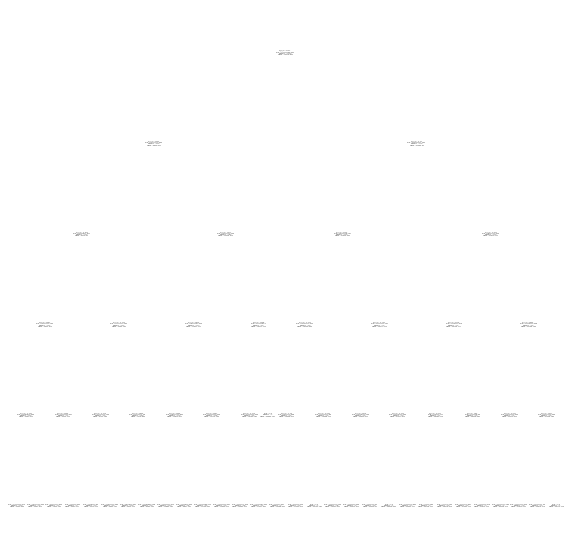

In [40]:
"""
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that might be present.
The visualization is fit automatically to the size of the axis. Use the figsize or dpi arguments of plt.figure to control the size of the rendering.
"""
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
sklearn.tree.plot_tree(decision_tree_reg)

In [41]:
"""
Random forest regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy 
and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
"""

from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.8786362276689045
Testing Accuracy:  0.8969134302201285
RMSE for Training Data:  4164.37754192943
RMSE for Testing Data:  4028.5709486806763
Accuracy for 20 - Fold Cross Predicted:  0.8577794137848505


**The model with the highest accuracy is Random Forest compared to other models.**

In [42]:
# input_data = {'age': [35],
#               'sex': ['male'],
#               'bmi': [26],
#               'children': [0],
#               'smoker': ['no'],
#               'region': ['southeast']}

# input_data = pd.DataFrame(input_data)
# input_data

In [43]:
# # Scale our input data  
# input_data = sc.transform(input_data)
# input_data

In [44]:
# # Reshape our input data in the format required by sklearn models
# input_data = input_data.reshape(1, -1)
# print(input_data.shape)
# input_data

In [45]:
# # Get our predicted insurance rate for our new customer
# model_rfr.predict(input_data)

In [46]:
# # Note Standard Scaler remembers your inputs so you can use it still here
# print(sc.mean_)
# print(sc.scale_)